In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_datareader as data
!pip install yahoo-finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

# Define the ticker for the stock you want to get data for
ticker = "AAPL"

# Download 3 months of historical data using the daily time frame
data = yf.download(ticker, period="10y", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:

data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-03-18,15.766071,16.337856,15.757143,16.275715,14.057029,606197200
1,2013-03-19,16.410713,16.463215,16.017857,16.231787,14.019094,526775200
2,2013-03-20,16.336430,16.343929,16.056786,16.145714,13.944746,308660800
3,2013-03-21,16.079287,16.356428,16.075001,16.168928,13.964798,383255600
4,2013-03-22,16.235001,16.503571,16.182501,16.496786,14.247960,395105200


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2514,2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
2515,2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2516,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2517,2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100
2518,2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98862500


In [ ]:
data = data.drop(['Date'],axis =1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,15.766071,16.337856,15.757143,16.275715,14.057029,606197200
1,16.410713,16.463215,16.017857,16.231787,14.019094,526775200
2,16.336430,16.343929,16.056786,16.145714,13.944746,308660800
3,16.079287,16.356428,16.075001,16.168928,13.964798,383255600
4,16.235001,16.503571,16.182501,16.496786,14.247960,395105200


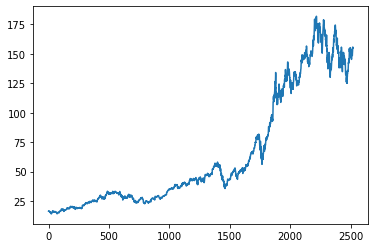

In [ ]:
plt.plot(data.Close)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
0,15.766071,16.337856,15.757143,16.275715,14.057029,606197200
1,16.410713,16.463215,16.017857,16.231787,14.019094,526775200
2,16.336430,16.343929,16.056786,16.145714,13.944746,308660800
3,16.079287,16.356428,16.075001,16.168928,13.964798,383255600
4,16.235001,16.503571,16.182501,16.496786,14.247960,395105200
...,...,...,...,...,...,...
2514,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
2515,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2516,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2517,152.160004,156.460007,151.639999,155.850006,155.850006,76161100


In [ ]:
mae100 = data.Close.rolling(100).mean()
mae100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2514    143.754999
2515    143.843399
2516    143.934699
2517    144.059300
2518    144.136600
Name: Close, Length: 2519, dtype: float64

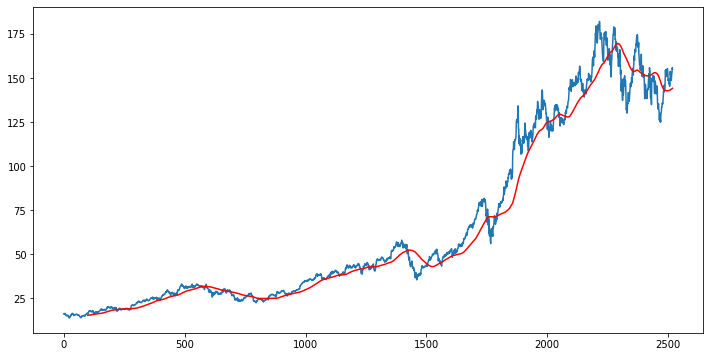

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(mae100,'r')

In [ ]:
mae200 = data.Close.rolling(200).mean()
mae200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2514    147.50435
2515    147.56470
2516    147.61075
2517    147.64180
2518    147.67260
Name: Close, Length: 2519, dtype: float64

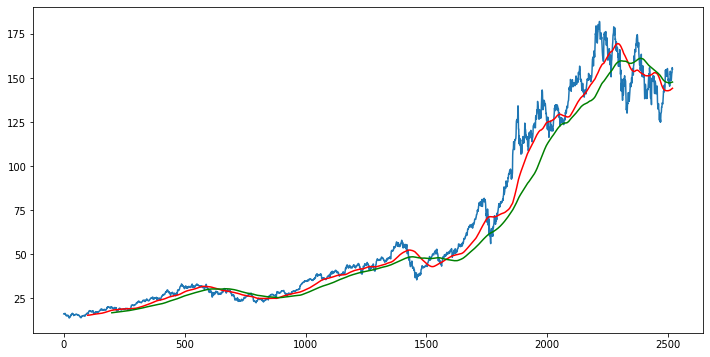

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(mae100,'r')
plt.plot(mae200,'g')

In [ ]:
data.shape

(2519, 6)

In [ ]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][:int(len(data)*0.70)])


In [ ]:
data_training.shape

(1763, 1)

In [ ]:
data_testing.shape

(756, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=( 0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array.shape

(1763, 1)

In [ ]:
x_train =[]
y_train =[]
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [ ]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
#2
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
#3
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
#4
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
#ADDING LAYERS
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer ='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 18s 245ms/step - loss: 0.0247
Epoch 2/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0058
Epoch 3/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0055
Epoch 4/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0047
Epoch 5/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0050
Epoch 6/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0041
Epoch 7/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0043
Epoch 8/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0035
Epoch 9/50
52/52 [==============================] - 13s 248ms/step - loss: 0.0033
Epoch 10/50
52/52 [==============================] - 13s 251ms/step - loss: 0.0035
Epoch 11/50
52/52 [==============================] - 13s 245ms/step - loss: 0.0033
Epoch 12/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0033
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
past_100 = data_training.tail(100)

In [ ]:
final_df = past_100.append(data_testing, ignore_index=True)

<ipython-input-40-6221e2e94e15>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(data_testing, ignore_index=True)


In [ ]:
final_df.head()

,Close
0,60.794998
1,60.895000
2,61.645000
3,62.262501
4,60.822498


In [ ]:
input_data = scaler.fit_transform( final_df)

In [ ]:
input_data

array([[0.03734588],
       [0.03814007],
       [0.04409635],
       [0.04900035],
       [0.03756428],
       [0.03750472],
       [0.04842456],
       [0.0624417 ],
       [0.06577721],
       [0.06504261],
       [0.06526098],
       [0.06960907],
       [0.07101876],
       [0.07510874],
       [0.07463219],
       [0.07961564],
       [0.07598233],
       [0.08217685],
       [0.08483732],
       [0.08322913],
       [0.07707429],
       [0.0747315 ],
       [0.07427483],
       [0.08338794],
       [0.07925827],
       [0.08630652],
       [0.08513512],
       [0.07900016],
       [0.06964881],
       [0.0741954 ],
       [0.08181943],
       [0.09200468],
       [0.08447996],
       [0.08757722],
       [0.0921238 ],
       [0.09349375],
       [0.10081998],
       [0.11017133],
       [0.11126335],
       [0.10993309],
       [0.110489  ],
       [0.10933748],
       [0.11839102],
       [0.11892707],
       [0.1301249 ],
       [0.12990648],
       [0.13332141],
       [0.137

In [ ]:
 x_test =[]
 y_test = []
 for i in range(100,input_data.shape[0]):
   x_test.append(input_data[i-100:i])
   y_test.append(input_data[i,0])

In [ ]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [ ]:
y_pred = model.predict(x_test)

24/24 [==============================] - 2s 68ms/step


In [ ]:
y_pred.shape

(756, 1)

In [ ]:
y_test

array([0.04427503, 0.04052257, 0.00966905, 0.        , 0.04469198,
       0.0419918 , 0.06764351, 0.04639945, 0.0604364 , 0.05940397,
       0.03283898, 0.04082037, 0.03383169, 0.07564478, 0.06960907,
       0.08279233, 0.08660432, 0.09704768, 0.12444655, 0.11924474,
       0.12373183, 0.11600849, 0.10435404, 0.08735879, 0.10270616,
       0.10058174, 0.11634604, 0.11674315, 0.10762998, 0.12579669,
       0.13784818, 0.12845715, 0.13657754, 0.14531341, 0.15140868,
       0.15758333, 0.17027024, 0.17995914, 0.17281159, 0.16534636,
       0.16909885, 0.16546548, 0.17985983, 0.1762464 , 0.18833764,
       0.18361231, 0.1876626 , 0.18337407, 0.18611391, 0.1863919 ,
       0.18577642, 0.19353945, 0.19649772, 0.20003177, 0.1944726 ,
       0.21269881, 0.21659023, 0.23749677, 0.25506781, 0.22143467,
       0.2271924 , 0.23551135, 0.25355887, 0.25258603, 0.25286402,
       0.24887329, 0.26703994, 0.28224831, 0.2694026 , 0.27889294,
       0.25663632, 0.27281754, 0.2788135 , 0.27744355, 0.27744

In [ ]:
scaler.scale_

array([0.00794171])

In [ ]:
scale_factor = 1/0.00794171

In [ ]:
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

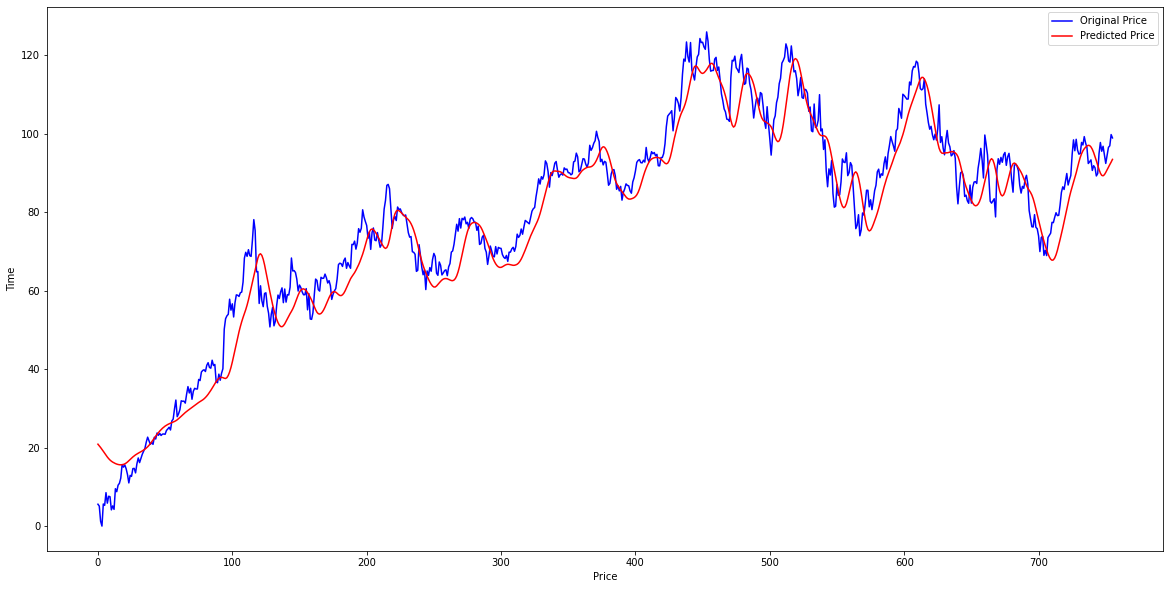

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label = 'Predicted Price')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.show()